In [1]:
from get_parameters import *
from InitializeDict_M_Coeff import *
from optimization_problems import * 
from transfer_classifiers import * 


In [ ]:
masks_paths=get_lists_of_of_paths(path_to_images)

roi_masks=[]
segm_masks=[]
for j in range(len(masks_paths)):
    mid_file=get_lists_of_of_paths(masks_paths[j])
    roi_masks.append(np.load(mid_file[3]))

    segm_mask = sitk.ReadImage(mid_file[1], sitk.sitkFloat32)
    segm_masks.append(sitk.GetArrayFromImage(segm_mask))


In [84]:
for path in get_lists_of_of_paths('./subjects'):
    image = sitk.ReadImage(path)
    image_array = (sitk.GetArrayFromImage(image)).reshape(384,384)




mri_files=get_lists_of_of_paths('./subjects')

print(mri_files)
image_paths=[]
mri_images=[]
for j in range(44,100): #len(mri_files)):
    mid_file=get_lists_of_of_paths(mri_files[j])
    image_paths.append(get_lists_of_of_paths(mid_file[0]))
    for i in range(160):   
        image = sitk.ReadImage(image_paths[j][0])
        image_array = (sitk.GetArrayFromImage(image)).reshape(384,384)
        name = "./MRI_Arrays/" + mri_files[j][-7:] + ".npy" 
        np.save(name, image_array)
    

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\1\sitk\Code\IO\src\sitkImageReaderBase.cxx:102:
sitk::ERROR: Unable to open "./subjects\9001104" for reading.

In [12]:
# masks_paths=get_lists_of_of_paths("./masks")
# for j in range(len(masks_paths)):
#     mid_file=get_lists_of_of_paths(masks_paths[j])
#     roi_mask = np.load(mid_file[3])
#     name = "./roi_masks_dataset/roi_" + masks_paths[j][-7:] + ".npy" 
#     np.save(name, roi_mask)


#     segm_mask = sitk.ReadImage(mid_file[1], sitk.sitkFloat32)
#     segm_mask_1 = sitk.GetArrayFromImage(segm_mask)
#     name = "./segm_masks_dataset/segm_" + masks_paths[j][-7:] + ".npy" 
#     np.save(name, segm_mask_1)

In [2]:

def makeshiftSIFT(array3d, x_coordinate, y_coordinate, z_coordinate ):

    XYaxis=array3d[:,:,z_coordinate].astype('uint8')
    XZaxis=array3d[:,y_coordinate,:].astype('uint8')
    YZaxis=array3d[x_coordinate,:,:].astype('uint8')
    # gray = cv2.cvtColor(XYaxis, cv2.COLOR_BGR2GRAY)
    keypoint1= cv2.KeyPoint(x_coordinate, y_coordinate, 1)
    _, descriptor1 = sift.compute(XYaxis, [keypoint1] )


    # gray = cv2.cvtColor(XZaxis, cv2.COLOR_BGR2GRAY)
    keypoint2= cv2.KeyPoint(x_coordinate, z_coordinate, 1)
    _, descriptor2 = sift.compute(XZaxis,[keypoint2])

    # gray = cv2.cvtColor(XZaxis, cv2.COLOR_BGR2GRAY)
    keypoint3= cv2.KeyPoint(y_coordinate, z_coordinate, 1)
    _, descriptor3 = sift.compute(XZaxis,[keypoint3])


    descriptor = descriptor1 + descriptor2 + descriptor3 
    descriptor = descriptor / 3

    return descriptor

In [81]:

def compute_descriptors1(image, segmetation_mask, name):

    FBlistofCoordinates=[]
    FAClistofCoordinates=[]
    TBlistofCoordinates=[]
    TAClistofCoordinates=[]
    image=image
    name=name
    # for y in range(150,275,3):
    #     for x in range(70,250,3):
    #         for z in range(30,120,3):
    #             if (segmetation_mask1[x,y,z]==1
    #                 and segmetation_mask2[x,y,z]!=0
    #                 and segmetation_mask3[x,y,z]!=0
    #                 and segmetation_mask4[x,y,z]!=1):
    #                 FBlistofCoordinates.append([x,y,z])
    #             elif (segmetation_mask1[x,y,z]==2
    #                 and segmetation_mask2[x,y,z]!=2
    #                 and segmetation_mask3[x,y,z]!=2
    #                 and segmetation_mask4[x,y,z]!=2):
    #                 FAClistofCoordinates.append([x,y,z])
    #             elif (segmetation_mask1[x,y,z]==3
    #                 and segmetation_mask2[x,y,z]!=3
    #                 and segmetation_mask3[x,y,z]!=3
    #                 and segmetation_mask4[x,y,z]!=3):
    #                 TBlistofCoordinates.append([x,y,z])
    #             elif (segmetation_mask1[x,y,z]==4
    #                 and segmetation_mask2[x,y,z]!=4
    #                 and segmetation_mask3[x,y,z]!=4
    #                 and segmetation_mask4[x,y,z]!=4):
    #                 TAClistofCoordinates.append([x,y,z])
    


    ListOfCoordinates=[]

    # for i in range(len(TAClistofCoordinates)):
    #     ListOfCoordinates.append(TAClistofCoordinates[i])

    
    # for i in range(len(TBlistofCoordinates)):
    #     ListOfCoordinates.append(TBlistofCoordinates[i])

    # for i in range(len(FAClistofCoordinates)):
    #     ListOfCoordinates.append(FAClistofCoordinates[i])

    # for i in range(len(FBlistofCoordinates)):
    #     ListOfCoordinates.append(FBlistofCoordinates[i])    

    for y in range(150,275,3):
        for x in range(70,250,3):
            for z in range(30,120,3):
                if segmetation_mask[x,y,z]==1:
                    FBlistofCoordinates.append([x,y,z])
                elif segmetation_mask[x,y,z]==2:
                    FAClistofCoordinates.append([x,y,z])
                elif segmetation_mask[x,y,z]==3:
                    TBlistofCoordinates.append([x,y,z])
                elif segmetation_mask[x,y,z]==4:
                    TAClistofCoordinates.append([x,y,z])



    # (np.array(TAClistofCoordinates),np.array(TBlistofCoordinates),np.array(FAClistofCoordinates),
    #                                   np.array(FBlistofCoordinates)), axis=0)


    # ListOfCoordinates = np.random.permutation(ListOfCoordinates.shape[0])

    for i in (0, 500, 1000, 2000, 7000, 13000):
        append_to_coordinates(ListOfCoordinates,TBlistofCoordinates, i) 
    for i in (0, 120, 240, 350, 480, 600, 710, 820 ,930, 1000):
        append_to_coordinates(ListOfCoordinates,TAClistofCoordinates, i)
    for i in (0, 120, 300, 500, 750, 900, 1100, 1300, 1400, 1575):
        append_to_coordinates(ListOfCoordinates,FAClistofCoordinates, i)
    for i in (0, 1500, 2800, 5000, 11000):
        append_to_coordinates(ListOfCoordinates,FBlistofCoordinates, i)
    

    return  ListOfCoordinates



In [57]:

# def get_images(path_to_images):    
#     mri_files=get_lists_of_of_paths(path_to_images)
#     image_paths=[]
#     mri_images=[]
#     j=0
#     for j in range(44,len(mri_files)):
#         mid_file=get_lists_of_of_paths(mri_files[j])
#         image_paths.append(get_lists_of_of_paths(mid_file[0]))
#         for i in range(160):
#             if i==0:    
#                 image = sitk.ReadImage(image_paths[j][0])
#                 image_array = (sitk.GetArrayFromImage(image)).reshape(384,384)
#             else:  
#                 image = sitk.ReadImage(image_paths[j][i])
#                 image_staging= sitk.GetArrayFromImage(image).reshape(384,384)
#                 image_array=np.dstack((image_array,image_staging))
#         name = "MRI_Dataset/" + mri_files[j][-7 :] + ".npy"
#         np.save(name,image_array)
        
#     # return image_array
#         # mri_images.append(image_array)



# get_images("./subjects")

# print("shape: " , str(np.load("MRI_Dataset/9002817.npy").shape)) , "\nUnique: " , str(np.unique(np.load("MRI_Dataset/9002817.npy")))

IndexError: list index out of range

In [83]:

# for i in range(3, 43):
image=(get_lists_of_of_paths("./MRI_Dataset")[0])
name_cache = image[-11:-4]
image_test = np.load(image)
mask1 = np.load("./segm_masks_dataset/segm_"+name_cache+".npy")


Coordinates =compute_descriptors1(image_test,mask1, name_cache )
# print(len(Coordinates))
np.save("Sampled_Coordinates.npy", Coordinates)

In [84]:
k=0
image_descriptor=[]
Coordinates_file=np.load("./Sampled_Coordinates.npy")
Coordinates_file=Coordinates_file.tolist()
for coordinate in Coordinates_file:
    local_descriptor = makeshiftSIFT(image_test, coordinate[0], coordinate[1], coordinate[2])
    temp_name= "./local_descriptors/image_descriptor_" + name_cache + "_" + str(k)
    np.save(temp_name, local_descriptor)
    k+=1


In [72]:
Coordinates=np.load("Sampled_Coordinates.npy")
Coordinates=Coordinates.tolist()
for coordinate in Coordinates:
    print(coordinate[0])

70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
82
82
82
82
82
82
82
82
82
82
82
82
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
106
115
115
115
115
115
115
115
115
118
118
118
118
118
118
121
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
79
82
82
82
82
82
82
82
82
82
82

In [130]:


def compute_descriptors_B(image, segmetation_mask, name):
    k=0
    for coordinate in Coordinates:
        local_descriptor = makeshiftSIFT(image, coordinate[0], coordinate[1], coordinate[2])
        temp_name= "./local_descriptors/image_descriptor_" + name + "_" + str(k)
        np.save(temp_name, local_descriptor)
        k+=1



for i in range(0,100):
    image=(get_lists_of_of_paths("./MRI_Dataset")[i])
    name_cache = image[-11:-4]
    print(name_cache)
    image_test = np.load(image)
    mask = np.load("./segm_masks_dataset/segm_"+name_cache+".npy")
    # Coordinates = compute_descriptors(image_test,mask, name_cache )
    compute_descriptors_B(image_test, mask, name_cache)


#     9001104
# 9002430
# 9002817
# 9004175
# 9005132
# 9006723
# 9007827
# 9011115
# 9011420
# 9013161
# 9013798


9001104
9002430
9002817
9004175
9005132
9006723
9007827
9011115
9011420
9013161
9013798


FileNotFoundError: [Errno 2] No such file or directory: './segm_masks_dataset/segm_9013798.npy'

In [109]:
print(len(get_lists_of_of_paths("./local_descriptors"))/1800)

21.004444444444445


In [101]:
# print(Coordinates)
# np.save("Sampled_Coordinates.npy",np.array(Coordinates))

In [102]:
# print(np.load("Sampled_Coordinates.npy"))

[[ 70 150  42]
 [ 70 150  45]
 [ 70 150  48]
 ...
 [166 258  54]
 [166 258  99]
 [166 258 102]]


In [99]:

def image_specific_SVM(coordinates, descriptors, array_with_labels):

    X=descriptors
    Y=[array_with_labels[coordinate[0], coordinate[1], coordinate[2]] for coordinate in coordinates]
    

    x_train=X[0:800]
    y_train=Y[0:1400]
    y_test=Y[1400:1800]

    # defining parameter range
    param_grid = {'C': [0.1, 1, 10, 100, 1000],  
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf', 'poly']
                } 
    
    grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, cv=5 )
    
    # fitting the model for grid search
    grid.fit(x_train, y_train)

    classifier = grid.best_estimator_
    classifier.fit(x_train, y_train)
    W = classifier.coeff_

    return W

In [ ]:
# w_901104 = image_specific_SVM()

In [106]:
# # Coordinates=

# x
# file_pattern = os.path.join(directory, f"local_descriptors/image_descriptor_{x_value}_*.npy")
def local_descriptors_of_subject(subject_no):

    x_train = np.empty((128, 0))
    for i in range(0,3100):
        path = "./local_descriptors/image_descriptor_" + str(subject_no) + "_" + str(i) + ".npy"
        cache_loader = np.load(path)
        x_train = np.hstack((x_train, cache_loader.reshape(-1,1)))

    x_train=np.transpose(x_train)
    print(x_train.shape)
    return x_train

In [107]:
X= local_descriptors_of_subject(9001104)

(3100, 128)


In [108]:
coordinates = np.load("Sampled_Coordinates.npy")

segm_mask=np.load("segm_masks_dataset/segm_9001104.npy")

print(coordinates.shape)

print(X.shape)


print(segm_mask.shape)


(3100, 3)
(3100, 128)
(384, 384, 160)


In [109]:
Y=[segm_mask[coordinate[0], coordinate[1], coordinate[2]] for coordinate in coordinates]


unique_values, counts = np.unique(Y, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Number of {value} values: {count}")
# print(Y[1700])
# count_zero = np.count_nonzero(Y == 0.0)
# count_one = np.count_nonzero(Y == 1.0)
# count_two = np.count_nonzero(Y == 2.0)
# count_three = np.count_nonzero(Y == 3.0)
# count_four = np.count_nonzero(Y == 4.0)

# print("Number of 0.0 values:", count_zero)
# print("Number of 1.0 values:", count_one)
# print("Number of 2.0 values:", count_two)
# print("Number of 3.0 values:", count_three)
# print("Number of 4.0 values:", count_four)



Number of 1.0 values: 500
Number of 2.0 values: 1000
Number of 3.0 values: 600
Number of 4.0 values: 1000


In [110]:
Y=np.array([Y])

In [112]:

# image_specific_SVM
# (coordinates, X, Y)
data=np.concatenate((X, Y.T), axis=1)
print(data[0])


[  1.           7.66666651   6.          11.33333302  21.33333397
  59.66666794   5.33333349   2.66666675  21.33333397   8.
  18.33333397   9.          22.          21.           8.
   4.66666651  64.66666412  57.          15.66666698   1.
   0.           1.33333337   4.66666651  20.33333397 105.
  52.66666794   1.33333337   0.           0.           0.
   5.          41.           0.           6.33333349  15.
   5.33333349  44.33333206  52.66666794  40.66666794   8.33333302
  15.66666698   4.33333349  13.          12.66666698  38.
  45.66666794  47.66666794  31.66666603  86.33333588  27.66666603
   9.66666698   2.33333325   0.          10.          43.66666794
  56.66666794 131.66667175  55.           7.           0.
   0.           0.          10.66666698  79.           4.
   0.           0.           5.33333349  43.33333206   9.66666698
  65.          54.           1.66666663   0.33333334   1.66666663
   5.33333349  43.33333206  27.33333397  81.          51.33333206
  59.           

In [113]:

np.random.shuffle(data)

x_train = data[:,:-1]
y_train = data[:,-1]
for column in range(x_train.shape[1]):
    x_train[:,column] = x_train[:,column] / max(x_train[:,column])
print(np.unique(x_train))

[0.         0.00239808 0.00240964 ... 0.99624066 0.9967533  1.        ]


In [118]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['poly']} 


# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
#
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, cv=5 , scoring='balanced_accuracy')

# fitting the model for grid search
grid.fit(x_train, y_train)
classifier = grid.best_estimator_
results = classifier.fit(x_train, y_train)
print(results)
print(grid.best_params_)
W = classifier.coef_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.527 total time=   0.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.510 total time=   0.8s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.517 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.525 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.493 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.319 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.298 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.286 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.289 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.296 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.287 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly

AttributeError: coef_ is only available when using a linear kernel

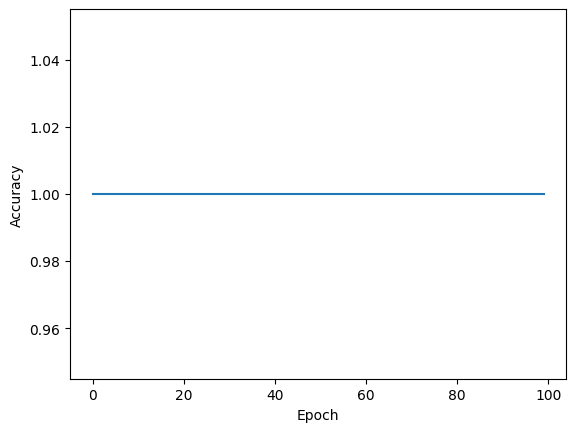

In [145]:
# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt
svm1=svm.SVC(C=0.1, gamma=1, kernel = 'poly')
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size= 0.9)

num_epochs = 100
history = []


# Plot accuracy over epochs
plt.plot(np.arange(num_epochs), history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# svm1.fit(x_train, y_train)
# train_pred= svm1.predict(x_train)
# print(classification_report(y_train, train_pred))
# print('=======================================================')
# test_pred= svm1.predict(x_test)
# print(classification_report(y_test, test_pred))


In [117]:
svm1=svm.SVC(C=10, gamma=0.1, kernel = 'poly')
svm1.fit(x_train, y_train)
y_pred= svm1.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         1.0       0.84      0.92      0.88       500
         2.0       0.84      0.82      0.83      1000
         3.0       0.99      0.62      0.77       600
         4.0       0.75      0.91      0.82      1000

    accuracy                           0.82      3100
   macro avg       0.86      0.82      0.82      3100
weighted avg       0.84      0.82      0.82      3100



In [102]:
from sklearn.metrics import confusion_matrix#, precision, recall, f1_score, balanced_accuracy
y_pred = classifier.predict(x_train)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[462  22   1  15]
 [ 29 828   5 138]
 [  5  43 448 104]
 [  4  49   3 944]]


[[257 146  55  42]
 [106 548  93 253]
 [ 25 146 232 197]
 [ 49 245  27 679]]